## Importing necessary libraries

In [60]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt

In [61]:
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

## Importing Dataset

In [62]:
data = pd.read_csv("mushrooms.csv")

## Lets see the data

In [63]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Describe the dataset

In [64]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Checking for Null values

In [65]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Checking the target

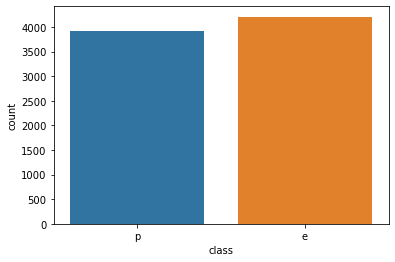

In [66]:
sns.countplot(x='class',data=data)
plt.show()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Checking the number of entries in target

In [68]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [69]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## Using Label Encoder to change the data into intergers

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le=LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [72]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Seperating features and label

In [73]:
y= data['class']
x= data.drop(['class'], axis =1)

## Plotting Scatter plot to check features vs label

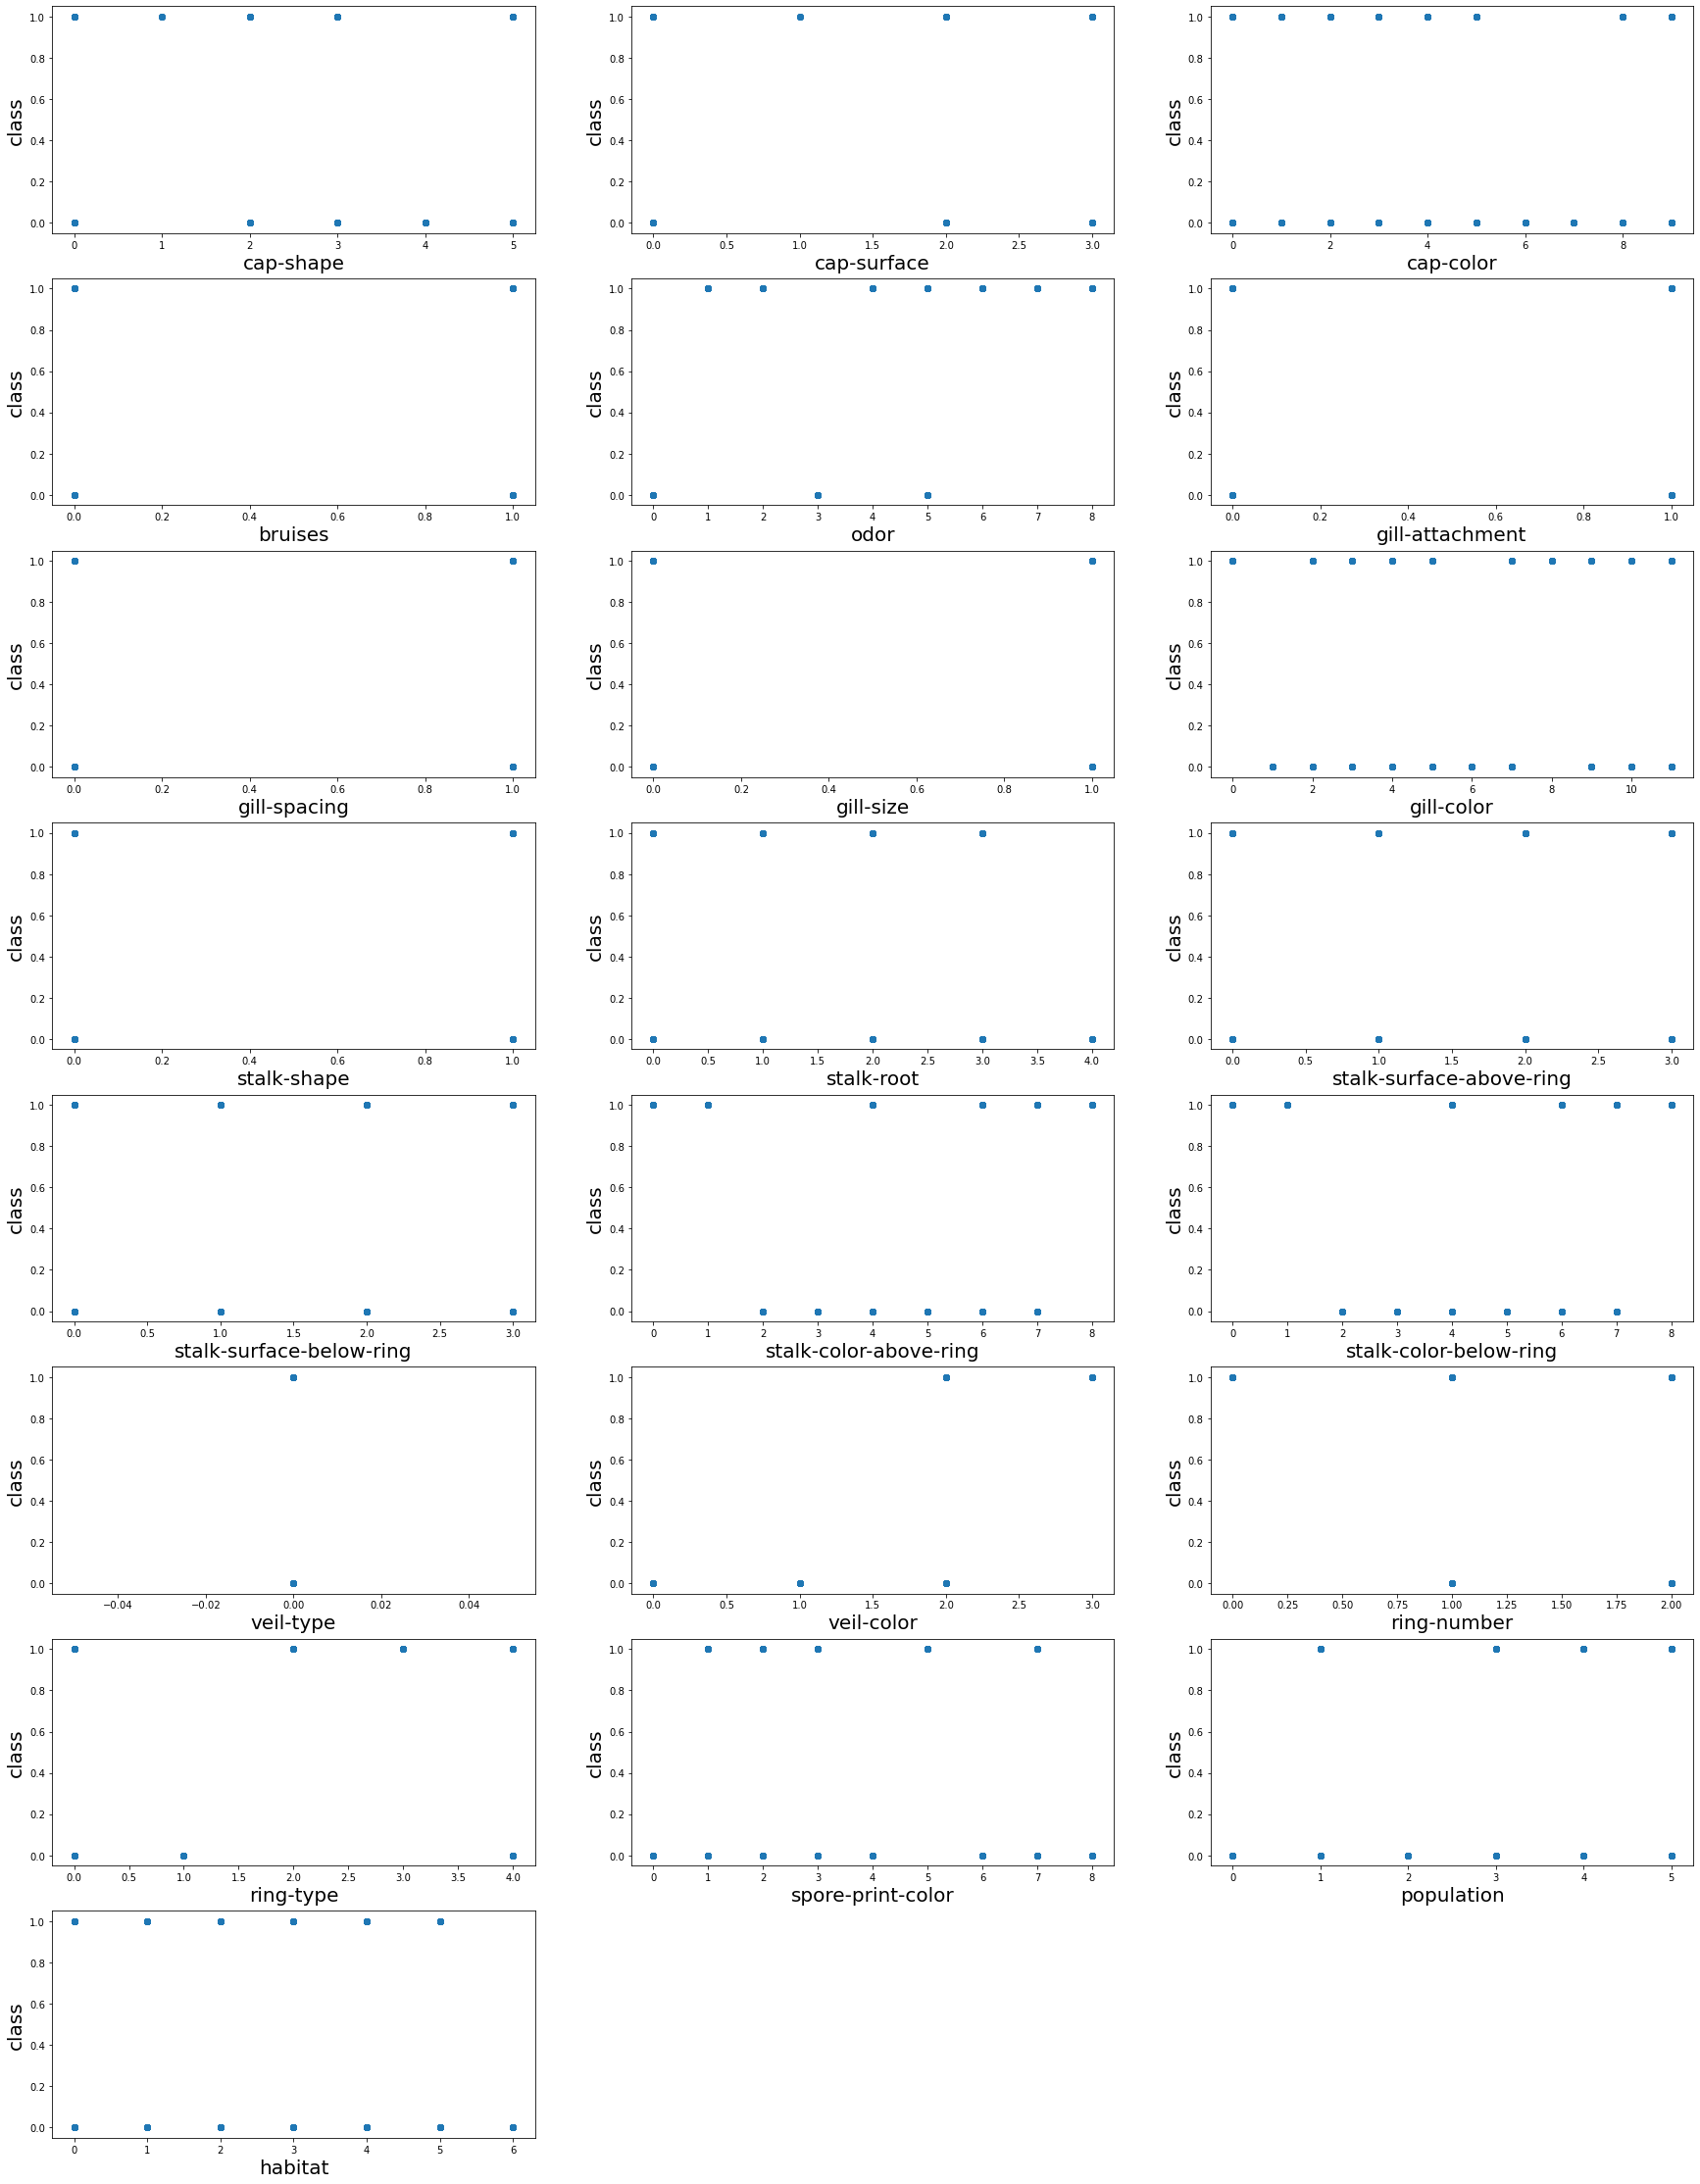

In [74]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in x:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber +=1
plt.show()

From this scatter plot I can clearly see that for veil-type it is always remaining 0 whether class is 1 or 0. So, I am dropping it.

In [75]:
data = data.drop(["veil-type"],axis=1)

In [76]:
data.shape

(8124, 22)

Let's now se the correlation between the fields


In [77]:
data_corr = data.corr()
data_corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


## Heat map to check the correlation

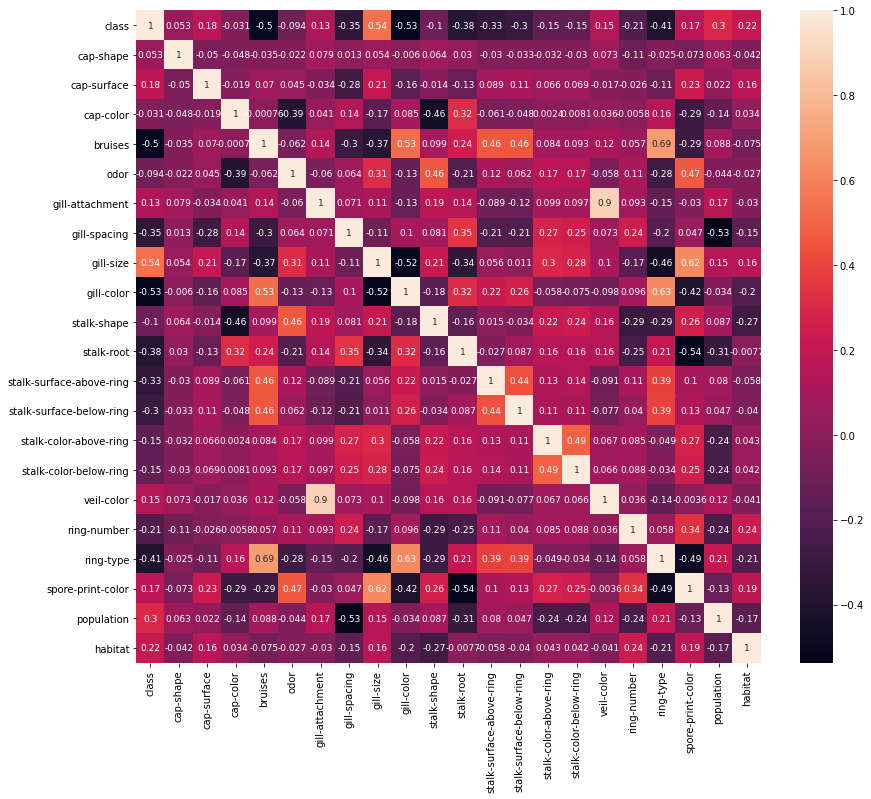

In [78]:
plt.figure(figsize=(14,12))
sns.heatmap(data_corr,annot=True, annot_kws={"size": 9})
plt.show()

Hear I can see that grill-attachment and veil color is highly co-related so we can drop any one of them. Apart from that  all the other co-relations are looking good and we can continue with this.

# Describing Dataset

In [79]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


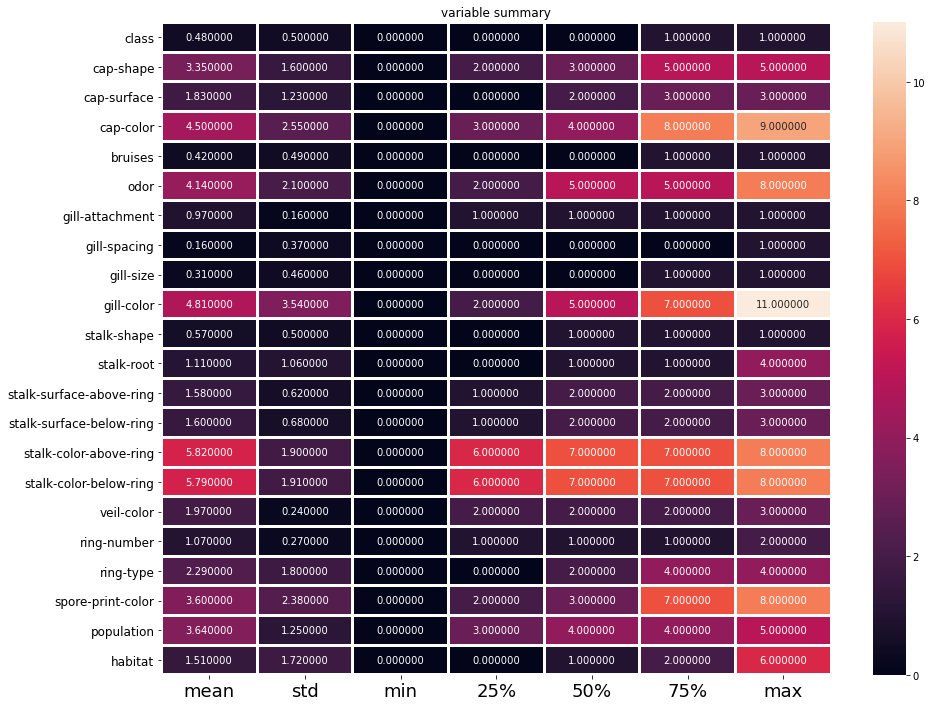

In [80]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()


# Outcome Of describe dataset

From the above plotting we can determine mean,standard devition,maximum, minimum value of each column.

Total number of rows in dataset- 8124

Total number of columns in dataset- 22

# Outliers checking

From the above we can see that few of the columns are having outliers but stock-color-below-ring and stock-color-above-ring are having more outliers.

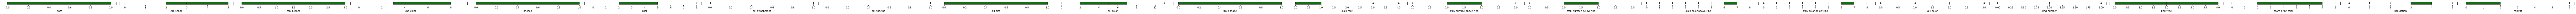

In [89]:
collist=data.columns.values
ncol=22
nrows= 20
plt.figure(figsize=(150,15))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skewness :


In [82]:
data.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

# Outcome of skewness threshold is taken as +/-0.7.
Columns having skewness are-

cap-color

gill-spacing

gill-size

stalk-root

stalk-surface-above-ring

stalk-surface-below-ring

stalk-color-above-ring     

stalk-color-below-ring     

veil-color                 

ring-number       

population


# Normal distribution checking


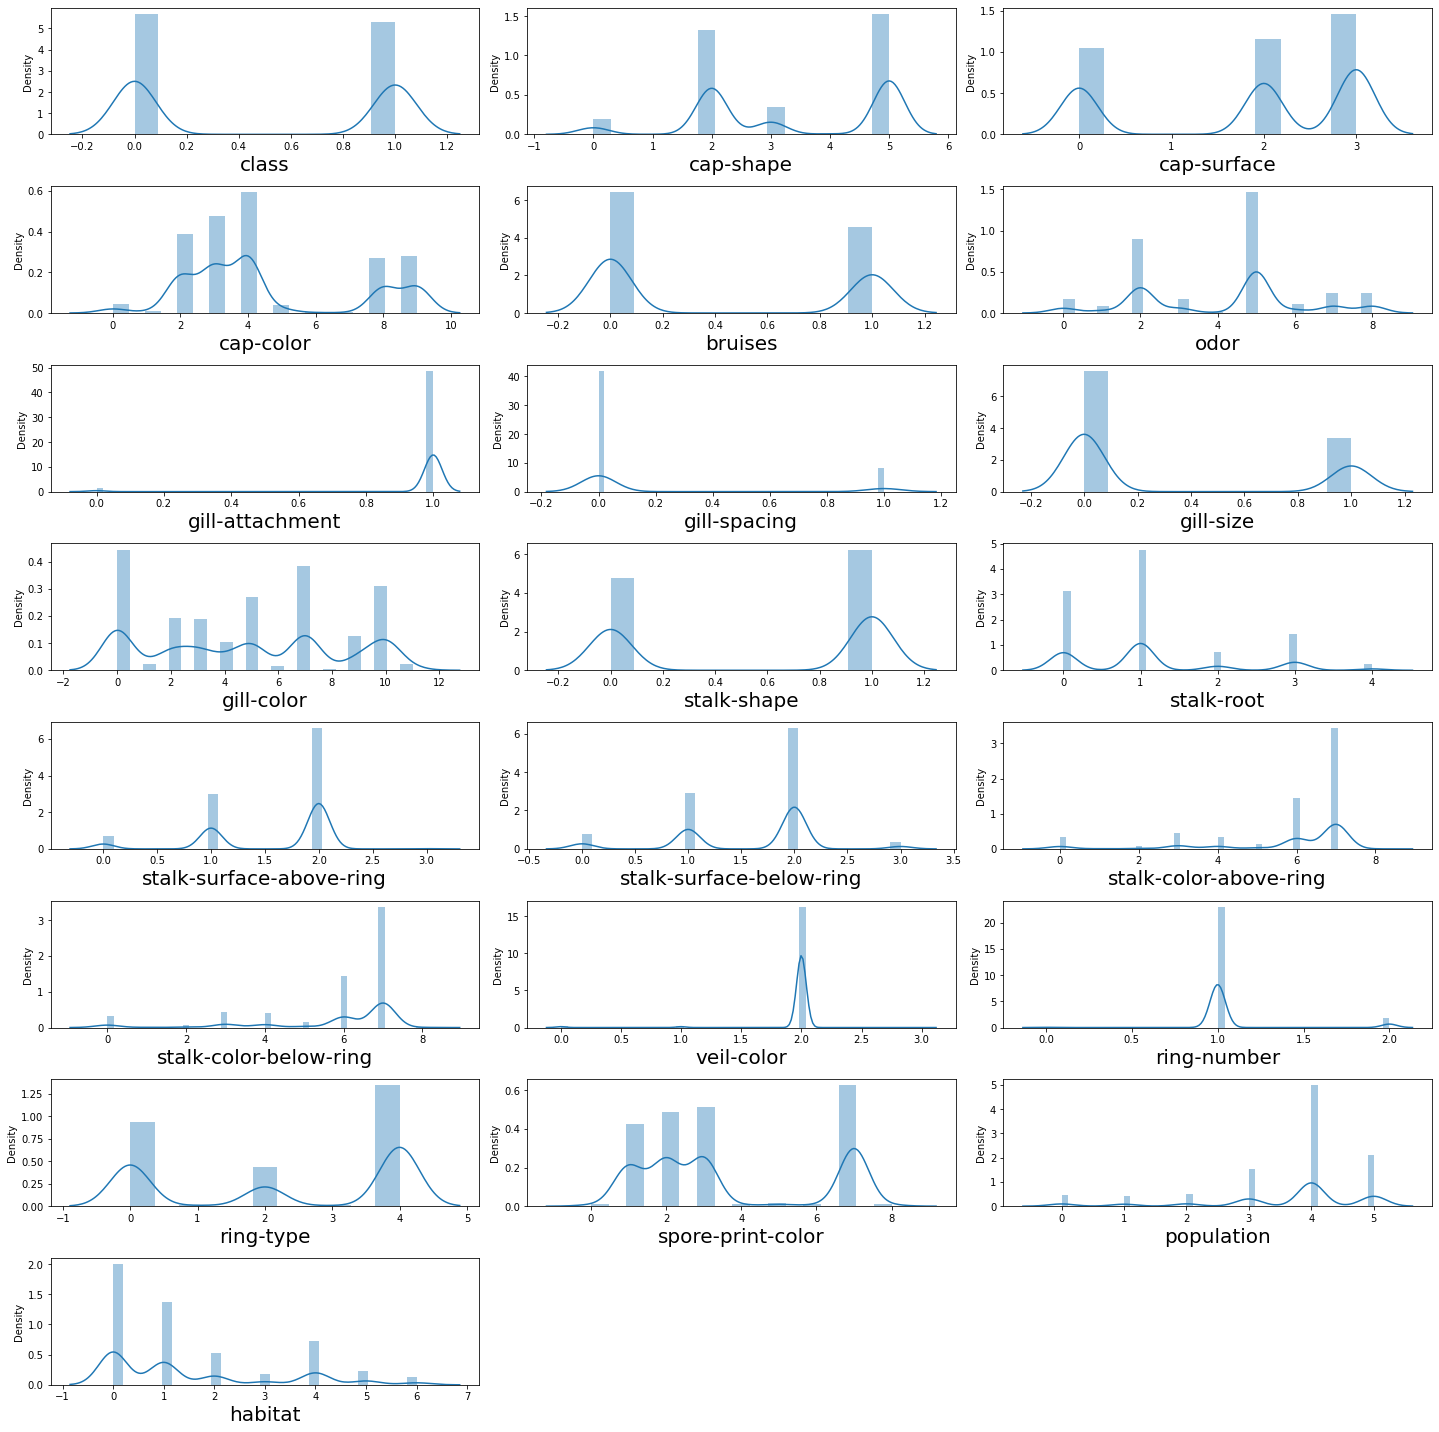

In [175]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber= 1
for column in data:
    if plotnumber<=22:
        ax= plt.subplot(8,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Removing Outliers:

In [93]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(8124, 22)

In [94]:
threshold =3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [95]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(8124, 22)
(6568, 22)



# Percentage of Data loss

In [96]:
loss_percentage=(8124-6568)/8124*100
print(loss_percentage)

19.15312653865091


Now diving features and label

In [104]:
x=data_new.iloc[:,1:]

In [117]:
y=data_new.iloc[:,0]

In [118]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8113    1
8116    1
8117    1
8118    1
8122    1
Name: class, Length: 6568, dtype: int32

In [125]:
x

array([[ 1.02847371, -0.21541126,  0.06941618, ..., -0.58718875,
        -0.93377457,  1.48060674],
       [ 1.02847371, -0.21541126,  1.58192192, ...,  0.07412388,
        -1.54441437,  0.32551632],
       [-1.94475686, -0.21541126,  1.35227301, ...,  0.07412388,
        -1.54441437,  1.1458141 ],
       ...,
       [-0.34804444, -0.21541126, -1.07174764, ...,  1.34196762,
         0.03998067, -1.06484603],
       [-0.34804444,  1.08243127,  0.06941618, ...,  1.34196762,
         0.03998067, -1.06484603],
       [-0.34804444,  1.08243127,  0.06941618, ...,  1.34196762,
         0.03998067,  0.85115486]])

# Transform data to remove skewness 

In [122]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [123]:
x

array([[ 1.02847371, -0.21541126,  0.06941618, ..., -0.58718875,
        -0.93377457,  1.48060674],
       [ 1.02847371, -0.21541126,  1.58192192, ...,  0.07412388,
        -1.54441437,  0.32551632],
       [-1.94475686, -0.21541126,  1.35227301, ...,  0.07412388,
        -1.54441437,  1.1458141 ],
       ...,
       [-0.34804444, -0.21541126, -1.07174764, ...,  1.34196762,
         0.03998067, -1.06484603],
       [-0.34804444,  1.08243127,  0.06941618, ...,  1.34196762,
         0.03998067, -1.06484603],
       [-0.34804444,  1.08243127,  0.06941618, ...,  1.34196762,
         0.03998067,  0.85115486]])

In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.02847371, -0.21541126,  0.06941618, ..., -0.58718875,
        -0.93377457,  1.48060674],
       [ 1.02847371, -0.21541126,  1.58192192, ...,  0.07412388,
        -1.54441437,  0.32551632],
       [-1.94475686, -0.21541126,  1.35227301, ...,  0.07412388,
        -1.54441437,  1.1458141 ],
       ...,
       [-0.34804444, -0.21541126, -1.07174764, ...,  1.34196762,
         0.03998067, -1.06484603],
       [-0.34804444,  1.08243127,  0.06941618, ...,  1.34196762,
         0.03998067, -1.06484603],
       [-0.34804444,  1.08243127,  0.06941618, ...,  1.34196762,
         0.03998067,  0.85115486]])

# Logistic regression :


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
from sklearn.metrics import accuracy_score

In [135]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train =lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy is:", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy is:", accuracy_score(y_test,pred_test)*100)
    

At random state 10 The model performs very well
At random state:- 10
Training accuracy is: 96.44080700418729
Testing accuracy is: 96.42313546423136
At random state 17 The model performs very well
At random state:- 17
Training accuracy is: 96.59307194518462
Testing accuracy is: 96.57534246575342
At random state 31 The model performs very well
At random state:- 31
Training accuracy is: 96.44080700418729
Testing accuracy is: 96.42313546423136
At random state 35 The model performs very well
At random state:- 35
Training accuracy is: 96.44080700418729
Testing accuracy is: 96.42313546423136
At random state 58 The model performs very well
At random state:- 58
Training accuracy is: 96.45984012181195
Testing accuracy is: 96.49923896499239
At random state 61 The model performs very well
At random state:- 61
Training accuracy is: 96.4979063570613
Testing accuracy is: 96.49923896499239
At random state 95 The model performs very well
At random state:- 95
Training accuracy is: 96.47887323943662
Test

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53       666
           1       0.51      0.50      0.50       648

    accuracy                           0.52      1314
   macro avg       0.52      0.51      0.51      1314
weighted avg       0.52      0.52      0.52      1314



# Cross validation score for Logistic regression:

In [156]:
pred_lr =lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lss =lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lss*100)
    print("Accuracy score is:-",lss*100)
    print("\n")


At cv:- 2
Cross validation score is:- 78.18209500609014
Accuracy score is:- 78.18209500609014


At cv:- 3
Cross validation score is:- 90.18129251487825
Accuracy score is:- 90.18129251487825


At cv:- 4
Cross validation score is:- 91.1388550548112
Accuracy score is:- 91.1388550548112


At cv:- 5
Cross validation score is:- 92.63213781862906
Accuracy score is:- 92.63213781862906


At cv:- 6
Cross validation score is:- 92.31229426315949
Accuracy score is:- 92.31229426315949


At cv:- 7
Cross validation score is:- 92.93836937760179
Accuracy score is:- 92.93836937760179


At cv:- 8
Cross validation score is:- 92.46345919610232
Accuracy score is:- 92.46345919610232


At cv:- 9
Cross validation score is:- 92.38774994623688
Accuracy score is:- 92.38774994623688




Since cross validation score accuracy score are almost same, we are heading with good approach.

In [159]:
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print("The CV score is:",lsscore_selected,"\nThe accuracy score is:",lss)

The CV score is: 0.9263213781862907 
The accuracy score is: 0.9238774994623689


# AUC ROC Curve

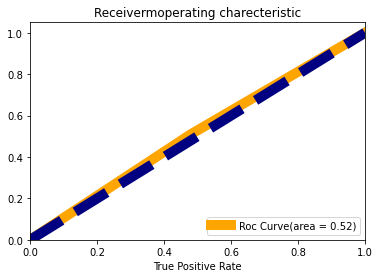

In [164]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='Roc Curve(area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receivermoperating charecteristic')
plt.legend(loc="lower right")
plt.show()

Since the model without outliers performing well, we will select that data frame.

# Model Saving :

In [176]:
import pickle
filename = 'mushroom_dataset.pkl'
pickle.dump(lr,open(filename, 'wb'))

# Conclusion

In [169]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
1309,1,1
1310,1,1
1311,1,1
1312,0,0
